# Analysis of cortical network model

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from tqdm import tqdm
from network import NeuralNetwork
from logger import logger
from utils import *

t0 = time.perf_counter()

## Input parameters

In [4]:
# Drive parameters
noise_amp = 1e-2  # noise amplitude (mA/cm2)

# Stimulus parameters
start = 50 # start time (ms)
dur = 150  # duration (ms)
Pref = 1e6  # pressure amplitude (Pa)
Pmax = 3e6  # maximum pressure amplitude (Pa)
Iref = pressure_to_intensity(Pref) / 1e4  # corresponding intensity (W/cm2)
Imax = pressure_to_intensity(Pmax) / 1e4  # corresponding intensity (W/cm2)
Isppa_range = sqrtspace(0, Imax, 15)  # range of intensities to sweep
Isppa_range_dense = sqrtspace(0, Imax, 30)  # dense range of intensities to sweep

# Simulation parameters
tstop = 350  # default simulation duration (ms)
nreps = 1  # number of repetitions per simulation (for sweep trends)

# Logging
paramsstr = {
    'noise': [
        f'amplitude = {noise_amp:.3f} mA/cm2'],
    'stimulus': [
        f'start = {start} ms',
        f'duration = {dur} ms',
        f'P = {Pref * 1e-6:.1f} MPa <-> I = {Iref:.2f} W/cm2',
        f'range of intensities = {Isppa_range[0]:.2f} - {Isppa_range[-1]:.2f} W/cm2'],
    'simulation': [
        f'duration = {tstop} ms',
        f'number of repetitions (for sweeps) = {nreps}']
}
paramsstr = {k: '\n'.join([f'       - {x}' for x in v]) for k, v in paramsstr.items()}
paramsstr = '\n'.join([f'   - {k}:\n{v}' for k, v in paramsstr.items()]) 
logger.info('Input parameters:\n' + paramsstr)

 16/01/2024 13:16:30: Input parameters:
   - noise:
       - amplitude = 0.010 mA/cm2
   - stimulus:
       - start = 50 ms
       - duration = 150 ms
       - P = 1.0 MPa <-> I = 30.91 W/cm2
       - range of intensities = 0.00 - 278.22 W/cm2
   - simulation:
       - duration = 350 ms
       - number of repetitions (for sweeps) = 1


## Network model

In [5]:
# Initialize 3-nodes model temperature-dependent components
nnodes = 36
model = NeuralNetwork(
    nnodes,
    Q10_rates=3,
    Q10_gNa=1.40,
    Q10_gKd=4.75,
    gKT=NeuralNetwork.gKT_default,  # S/cm2
    a=1e-4, 
    b=0.5,
    synweight=60e-6, # synaptic weight (S/cm2)
    conrate=.5
)

# Set stimulus start and duration
model.start = start
model.dur = dur

# Set simulation duration
model.tstop = tstop

 16/01/2024 13:16:32: NeuralNetwork(36): created 36 nodes


 16/01/2024 13:16:32: NeuralNetwork(36): connecting 50.0% (630/1260) of candidate node pairs
 16/01/2024 13:16:32: NeuralNetwork(36): setting Q10_rates = 3 on all nodes
 16/01/2024 13:16:32: NeuralNetwork(36): setting Q10_gNa = 1.4 on all nodes
 16/01/2024 13:16:32: NeuralNetwork(36): setting Q10_gKd = 4.75 on all nodes
 16/01/2024 13:16:32: NeuralNetwork(36): setting gKT = 4.898648648648648e-06 on all nodes
 16/01/2024 13:16:32: NeuralNetwork(36): setting a = 0.0001 on all nodes
 16/01/2024 13:16:32: NeuralNetwork(36): setting b = 0.5 on all nodes
 16/01/2024 13:16:32: NeuralNetwork(36): initialized


## Simulations

### Evoked spiking activity in sonicated nodes, as a function of network connection rate, synaptic weights, and sonicated fraction

 16/01/2024 13:28:49: NeuralNetwork(36): removing all connections between nodes
 16/01/2024 13:28:49: NeuralNetwork(36): connecting 20.0% (252/1260) of candidate node pairs
 16/01/2024 13:28:49: NeuralNetwork(36): setting all synaptic weights to 1.00e-05 S/cm2


100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

 16/01/2024 13:28:53: NeuralNetwork(36): setting all synaptic weights to 1.50e-05 S/cm2



100%|██████████| 10/10 [00:04<00:00,  2.43it/s]

 16/01/2024 13:28:57: NeuralNetwork(36): setting all synaptic weights to 2.00e-05 S/cm2



100%|██████████| 10/10 [00:06<00:00,  1.65it/s]

 16/01/2024 13:29:03: NeuralNetwork(36): removing all connections between nodes
 16/01/2024 13:29:03: NeuralNetwork(36): connecting 25.0% (315/1260) of candidate node pairs
 16/01/2024 13:29:03: NeuralNetwork(36): setting all synaptic weights to 1.00e-05 S/cm2



100%|██████████| 10/10 [00:03<00:00,  2.85it/s]

 16/01/2024 13:29:06: NeuralNetwork(36): setting all synaptic weights to 1.50e-05 S/cm2



100%|██████████| 10/10 [00:05<00:00,  1.87it/s]

 16/01/2024 13:29:12: NeuralNetwork(36): setting all synaptic weights to 2.00e-05 S/cm2



100%|██████████| 10/10 [00:09<00:00,  1.09it/s]

 16/01/2024 13:29:21: NeuralNetwork(36): removing all connections between nodes
 16/01/2024 13:29:21: NeuralNetwork(36): connecting 30.0% (378/1260) of candidate node pairs
 16/01/2024 13:29:21: NeuralNetwork(36): setting all synaptic weights to 1.00e-05 S/cm2



100%|██████████| 10/10 [00:04<00:00,  2.44it/s]

 16/01/2024 13:29:25: NeuralNetwork(36): setting all synaptic weights to 1.50e-05 S/cm2



100%|██████████| 10/10 [00:07<00:00,  1.37it/s]

 16/01/2024 13:29:32: NeuralNetwork(36): setting all synaptic weights to 2.00e-05 S/cm2



100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


Text(0.5, 1.0, 'I = 200 W/cm2')

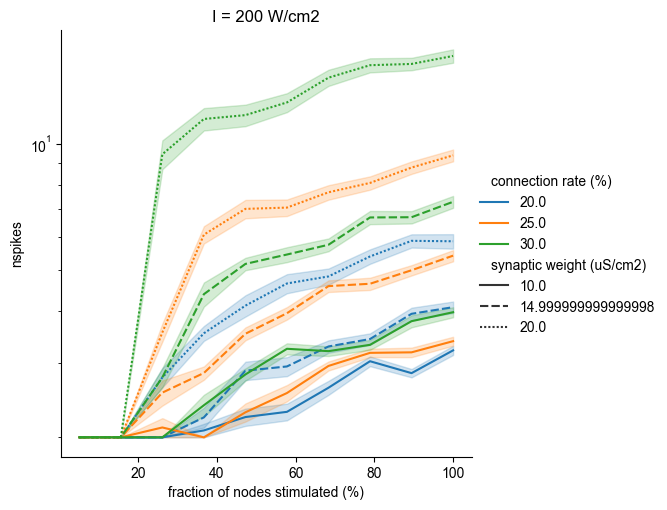

In [9]:
# Set stimulus amplitude
Isppa = 200.  # W/cm2

# Define vectors of connection rates, synaptic weights and stimulated fractions
conrates = np.linspace(0.2, .3, 3)
synweights = np.array([10, 15, 20]) * 1e-6
stimfracs = np.linspace(0.05, 1, 10)

# Initialize nspikes container
nspikes = []

# Sweep connection rates, synaptic weights and stimulated fractions, and compute nspikes
for conrate in conrates:
    model.set_connection_rate(conrate)
    for synweight in synweights:
        model.set_synaptic_weight(synweight)
        model.verbose = False
        for stimfrac in tqdm(stimfracs):
            model.set_stim(Isppa, fraction=stimfrac)
            data = model.simulate()
            nspikes.append(
                model.compute_metric(data, 'nspikes', inodes='stim'))
        model.verbose = True
nspikes = pd.concat(
    nspikes, 
    axis=0, 
    keys=itertools.product(
        conrates * 1e2, 
        synweights * 1e6, 
        stimfracs * 1e2
    ), 
    names=[
        'connection rate (%)', 
        'synaptic weight (uS/cm2)', 
        'fraction of nodes stimulated (%)'
    ]
)

# Plot average number of spikes in sonicated nodes, as a function of the fraction of stimulated nodes
fg = sns.relplot(
    kind='line',
    data=nspikes.reset_index(), 
    x='fraction of nodes stimulated (%)', 
    y='nspikes',
    hue='connection rate (%)',
    palette='tab10',
    style='synaptic weight (uS/cm2)',
    errorbar='se',
)
fig = fg.fig
fig.axes[0].set_yscale('log')
fig.axes[0].set_title(f'I = {Isppa:.0f} W/cm2')

### Evoked spiking activity in sonicated and non-sonicated nodes across ISPPA range, as a function of fraction of sonicated nodes

 16/01/2024 13:31:33: NeuralNetwork(36): removing all connections between nodes
 16/01/2024 13:31:33: NeuralNetwork(36): connecting 6.0% (76/1260) of candidate node pairs
 16/01/2024 13:31:33: NeuralNetwork(36): setting all synaptic weights to 1.00e-04 S/cm2
 16/01/2024 13:31:33: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:01<00:00, 11.55it/s]


 16/01/2024 13:31:35: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:01<00:00, 12.37it/s]

 16/01/2024 13:31:36: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities



100%|██████████| 14/14 [00:01<00:00, 13.70it/s]

 16/01/2024 13:31:37: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities



100%|██████████| 14/14 [00:01<00:00, 13.19it/s]


 16/01/2024 13:31:38: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:00<00:00, 14.35it/s]


 16/01/2024 13:31:40: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:03<00:00,  3.91it/s]


 16/01/2024 13:31:44: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:05<00:00,  2.45it/s]


 16/01/2024 13:31:51: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:04<00:00,  2.80it/s]


 16/01/2024 13:31:57: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:08<00:00,  1.61it/s]


 16/01/2024 13:32:08: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:08<00:00,  1.72it/s]


 16/01/2024 13:32:18: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:08<00:00,  1.56it/s]


 16/01/2024 13:32:30: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:12<00:00,  1.13it/s]


 16/01/2024 13:32:45: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:09<00:00,  1.48it/s]


 16/01/2024 13:32:56: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:10<00:00,  1.39it/s]


 16/01/2024 13:33:09: NeuralNetwork(36): running simulation sweep across 14 stimulus intensities


100%|██████████| 14/14 [00:11<00:00,  1.24it/s]


Text(0.5, 1.0, 'connection rate = 6%, w = 100 uS/cm2')

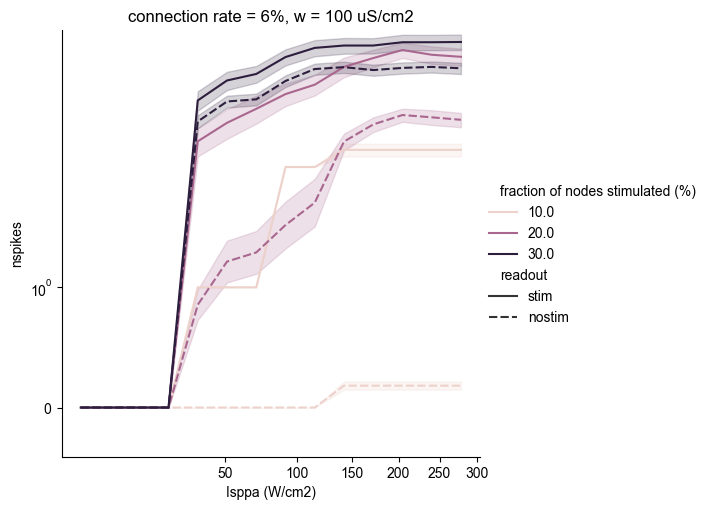

In [10]:
# Set connection rate and synaptic weight
model.set_connection_rate(.06)  # from Vierling-Claassen et al. 2010
model.set_synaptic_weight(1e-4)  # from Vierling-Claassen et al. 2010 (S/cm2)

# Set stimulus sensitivity
model.set_mech_param(a=1e-4)

# Define vector of stimulated fractions
stimfracs = np.linspace(.1, .3, 3).round(2)

# Sweep stimulated fractions, and compute nspikes over Isppa range
readouts = ['stim', 'nostim']
nspikes = []
nreps = 5
ireps = np.array(range(nreps))
for stimfrac in stimfracs:
    for irep in ireps:
        stimdist = model.get_stimdist_vector(kind=stimfrac)
        data = model.run_stim_sweep(Isppa_range[1:], stimdist)
        for readout in readouts:
            nspikes.append(
                model.compute_metric(data, 'nspikes', inodes=readout))
nspikes = pd.concat(
    nspikes, 
    axis=0, 
    keys=itertools.product(
        stimfracs * 1e2, 
        ireps,
        readouts
    ), 
    names=[
        'fraction of nodes stimulated (%)',
        'rep',
        'readout'
    ]
)

fg = sns.relplot(
    kind='line',
    data=nspikes.reset_index(), 
    x=model.ISPPA_KEY,
    y='nspikes',
    hue='fraction of nodes stimulated (%)', 
    style='readout',
    errorbar='se',
    legend='full',
)
ax = fg.fig.axes[0]
model.set_ax_scale(ax, 'x', 'sqrt')
model.set_ax_scale(ax, 'y', 'symlog')
ax.set_title(f'connection rate = {model.get_connection_rate() * 1e2:.0f}%, w = {model.get_synaptic_weight() * 1e6:.0f} uS/cm2')

## Log completion

In [8]:
logger.info(f'notebook completed in {timedelta(seconds=time.perf_counter() - t0)}')

 20/12/2023 15:56:28: notebook completed in 0:01:45.366383
